# <center>Demo on Hashing</center>

In [16]:
import os
import numpy as np
import pandas as pd
import matplotlib.image as mpimg
import matplotlib.pyplot as plt
import cv2

In [17]:
# Reading multiple images from a folder
folder = "./YALE"
images = []
for file in os.listdir(folder):
    img = mpimg.imread(os.path.join(folder, file))
    img = cv2.resize(img,(100,100)) # Size of 100X100
    if img is not None:
        images.append(img)

In [18]:
# Vectorizing the images and storing it in a list
image_vector = []
for image in images:
    row,col = image.shape
    img_vec = image.reshape(row*col)
    img_vec_norm = img_vec / np.linalg.norm(img_vec)  # Making it a unit vector
    image_vector.append(img_vec_norm)

In [19]:
np.array(image_vector).shape

(165, 10000)

## Locality Sensitive Hashing – Random Projections

In [20]:
def genRandomHashVectors(m, length):  # Generate random unit vectors for Hashing
    hash_vector = []
    for i in range(m):
        v = np.random.uniform(-1,1,length)
        vcap = v / np.linalg.norm(v)
        hash_vector.append(vcap)
    return hash_vector    

In [21]:
def localSensitiveHashing(hash_vector ,data): 
    hash_code = []
    for i in range(len(hash_vector)):
        if np.dot(data,hash_vector[i]) > 0:
            hash_code.append('1')
        else:
            hash_code.append('0')
    return hash_code   

In [22]:
hash_vector = genRandomHashVectors(10,len(image_vector[0]))

In [23]:
localSensitiveHashing(hash_vector,image_vector[0])

['0', '0', '0', '1', '0', '1', '0', '0', '1', '1']

In [24]:
# Creating a Image Dictionary using the hash as the keys
image_dict = {}
for i in range(len(image_vector)):
    hash_code = localSensitiveHashing(hash_vector,image_vector[i])
    str_hash_code = ''.join(hash_code)
    if str_hash_code not in image_dict.keys():
        image_dict[str_hash_code] = [i]
    else:
        image_dict[str_hash_code].append(i) 

In [25]:
col_names = ["Hash_Codes","Image_Index"]
df = pd.DataFrame(image_dict.items(),columns=col_names)
df.head(30)

,Hash_Codes,Image_Index
0,0001010011,"[0, 1, 2, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14..."
1,1001010011,"[3, 35, 36, 79, 86, 91, 102, 112, 119]"
2,0001010001,"[18, 21, 110, 116, 117, 118, 120]"
3,1001010001,"[25, 58, 113, 114, 115, 135, 146]"
4,0000010011,"[28, 138]"
5,0101010011,"[44, 45, 46, 48, 49, 51, 52, 53, 54, 90, 92, 9..."
6,1101010011,"[47, 124]"
7,0011010011,"[61, 104, 109, 130]"
8,0001011011,[80]
9,0101010101,[98]


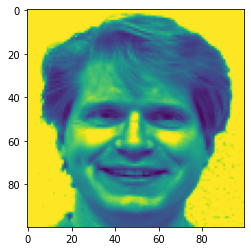

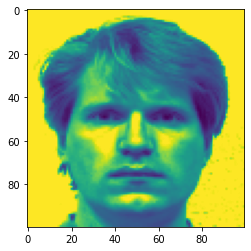

In [26]:
plt.imshow(images[2])
plt.show()
plt.imshow(images[4])
plt.show()

In [ ]:
### 2 and 4 are from same hash_codes